In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt, time

In [2]:
pd.set_option('display.max_columns', None) 

## Landslide Data EDA 
#### Notebook to drill into various landslide data sets for review. 

### USGS Landslide Data

#### **Note:** 
#### This dataset has a lot of duplicates, so some EDA/Data Processing needs to occur. There may be many landslides, but the lat/long for one has multiple entries with minor differences in values. 

In [3]:
## USGS Data
usg_landslide_df = pd.read_csv('USGS_Landslides.csv')

In [4]:
print(usg_landslide_df.shape)
usg_landslide_df.head(5).T

(612827, 17)


,0,1,2,3,4
OID,0,1,2,3,4
Inventory,AK DOT,AK DOT,AK DOT,AK DOT,AK DOT
Confidence,5,5,5,5,5
OriginalFC,point,point,point,point,point
elev_m,9.19728,9.16498,4.98749,13.8297,30.9083
slope_deg,13,23,20,18,14
relief_m,134,187,215,99,118
NA_L2CODE,7.1,7.1,7.1,7.1,7.1
NA_L2NAME,Marine West Coast Forest,Marine West Coast Forest,Marine West Coast Forest,Marine West Coast Forest,Marine West Coast Forest
n10_90m,26,14,67,57,29


## Drop Dupes - USGS

In [5]:
usg_landslide_df['Lat_N_TwoDec'] = usg_landslide_df['Lat_N'].round(2)
usg_landslide_df['Lon_E_TwoDec'] = usg_landslide_df['Lon_E'].round(2)

In [6]:
usg_landslide_df.iloc[0:3, -4:].T

,0,1,2
Lat_N,57.860340,57.851237,57.843300
Lon_E,-152.631517,-152.630538,-152.634308
Lat_N_TwoDec,57.860000,57.850000,57.840000
Lon_E_TwoDec,-152.630000,-152.630000,-152.630000


In [7]:
## Drop Dupes
usg_landslide_df.drop_duplicates(subset=['Lat_N_TwoDec', 'Lon_E_TwoDec'], keep='last', inplace=True)

In [8]:
usg_landslide_df.shape

(166294, 19)

In [9]:
## Review types of Confidence. 
usg_landslide_df['Confidence'].unique()

array([5, 3, 1, 8, 2])

In [10]:
## Count by Conf. 
usg_landslide_df.groupby('Confidence').agg({'Inventory':'count'})

,Inventory
Confidence,
1,10013
2,18265
3,65209
5,36420
8,36387


In [11]:
# diab.groupby('group').agg({'group':'count', 'glufast':['mean','min','median','max']})
usg_landslide_df.groupby('Inventory').agg({'Inventory':'count', 'Confidence':['min','median','max', 'mean']})

Inventory Confidence             \
                                                  count        min median max   
Inventory                                                                       
AK DOT                                              716          5    5.0   5   
AZ GS                                              3589          5    5.0   5   
CA GS                                             20005          1    3.0   8   
CO GS                                             16598          1    2.0   2   
East OK, West AR (Regmi & Walter, 2020)             106          8    8.0   8   
KY GS                                              7287          3    3.0   8   
MO DNR                                              168          3    5.0   5   
NASA                                               2483          1    2.0   5   
NC GS                                              3045          5    5.0   8   
NJ GS                                               184          5    5.0   5   
NV NBMG                                             679          2    2.0   2   
OR DOGAMI                                         25448          3    3.0   8   
Santa Catalina Island CA (Regmi et al., 2019)        21          8    8.0   8   
USDA-FS AK Tongass                                11514          8    8.0   8   
USGS AK Glacier Bay                                  20          8    8.0   8   
USGS AK St Elias                                    139          8    8.0   8   
USGS CA Crow Creek 1998                             156          8    8.0   8   
USGS CA LA County Jan 2019                           29          3    8.0   8   
USGS CA Montecito Jan 2018                           14          8    8.0   8   
USGS CA Walpert Ridge 1998                           84          8    8.0   8   
USGS CO Front Range July 1999                        85          8    8.0   8   
USGS CO Front Range Sept 2013                       361          8    8.0   8   
USGS Conterminous                                  4163          3    3.0   3   
USGS MN LIDAR                                      3240          8    8.0   8   
USGS OR Coast Nov 1996                              116          8    8.0   8   
USGS PA (Pomeroy, 1974)                            1180          2    3.0   5   
USGS PR Hurricane Maria 2019                       3433          8    8.0   8   
USGS Post-Fire Debris Flows                         323          3    3.0   3   
USGS Seismic Ground Failure                        4202          3    3.0   8   
USGS WA Puget Sound                                  23          5    5.0   5   
UT GRC                                            14330          3    3.0   5   
VT GS                                              1251          2    2.0   2   
WA SDIC                                             103          5    5.0   5   
WA WGS                                            19732          2    3.0   8   
WY WSGS                                           20518          5    5.0   5   
West Coast Slow Moving (Yuankun et al., 2021)       688          8    8.0   8   
Western CO (Regmi et al., 2010)                     261          8    8.0   8   

                                                         
                                                   mean  
Inventory                                                
AK DOT                                         5.000000  
AZ GS                                          5.000000  
CA GS                                          2.816396  
CO GS                                          1.552597  
East OK, West AR (Regmi & Walter, 2020)        8.000000  
KY GS                                          3.799506  
MO DNR                                         4.976190  
NASA                                           2.047120  
NC GS                                          6.466010  
NJ GS                                          5.000000  
NV NBMG                                        2.00

In [12]:
## Query for 
usgs_conf_query = usg_landslide_df.query("Confidence == 8")
usgs_conf_query['Lat_v2'] = usgs_conf_query['Lat_N']
print(usgs_conf_query.shape)
usgs_conf_query.head(3)

(36387, 20)


/tmp/ipykernel_10659/94872324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs_conf_query['Lat_v2'] = usgs_conf_query['Lat_N']


,OID,Inventory,Confidence,OriginalFC,elev_m,slope_deg,relief_m,NA_L2CODE,NA_L2NAME,n10_90m,lw_90m,n5_90m,jia_1km,godt_1km,nasa_1km,Lat_N,Lon_E,Lat_N_TwoDec,Lon_E_TwoDec,Lat_v2
18870,18870,CA GS,8,point,202.167007,17,345,7.1,Marine West Coast Forest,68,68,81,NaN,1.0,5,40.319986,-123.915512,40.32,-123.92,40.319986
34452,34452,CA GS,8,point,29.637100,5,224,7.1,Marine West Coast Forest,12,12,36,1.0,1.0,4,41.212677,-124.091241,41.21,-124.09,41.212677
68236,68236,CA GS,8,point,264.402008,35,223,7.1,Marine West Coast Forest,80,80,81,0.0,1.0,5,37.615452,-122.454017,37.62,-122.45,37.615452


In [13]:
## Restructure data. 
usgs_conf_query_new = usgs_conf_query.iloc[:,[16,15,0,1,2,3,4,5,6,7,8]]
usgs_conf_query_new.head(2)

,Lon_E,Lat_N,OID,Inventory,Confidence,OriginalFC,elev_m,slope_deg,relief_m,NA_L2CODE,NA_L2NAME
18870,-123.915512,40.319986,18870,CA GS,8,point,202.167007,17,345,7.1,Marine West Coast Forest
34452,-124.091241,41.212677,34452,CA GS,8,point,29.637100,5,224,7.1,Marine West Coast Forest


In [14]:
usgs_conf_query_new['relief_m'].unique()

array([ 345,  224,  223, ..., 1098,    4,  945])

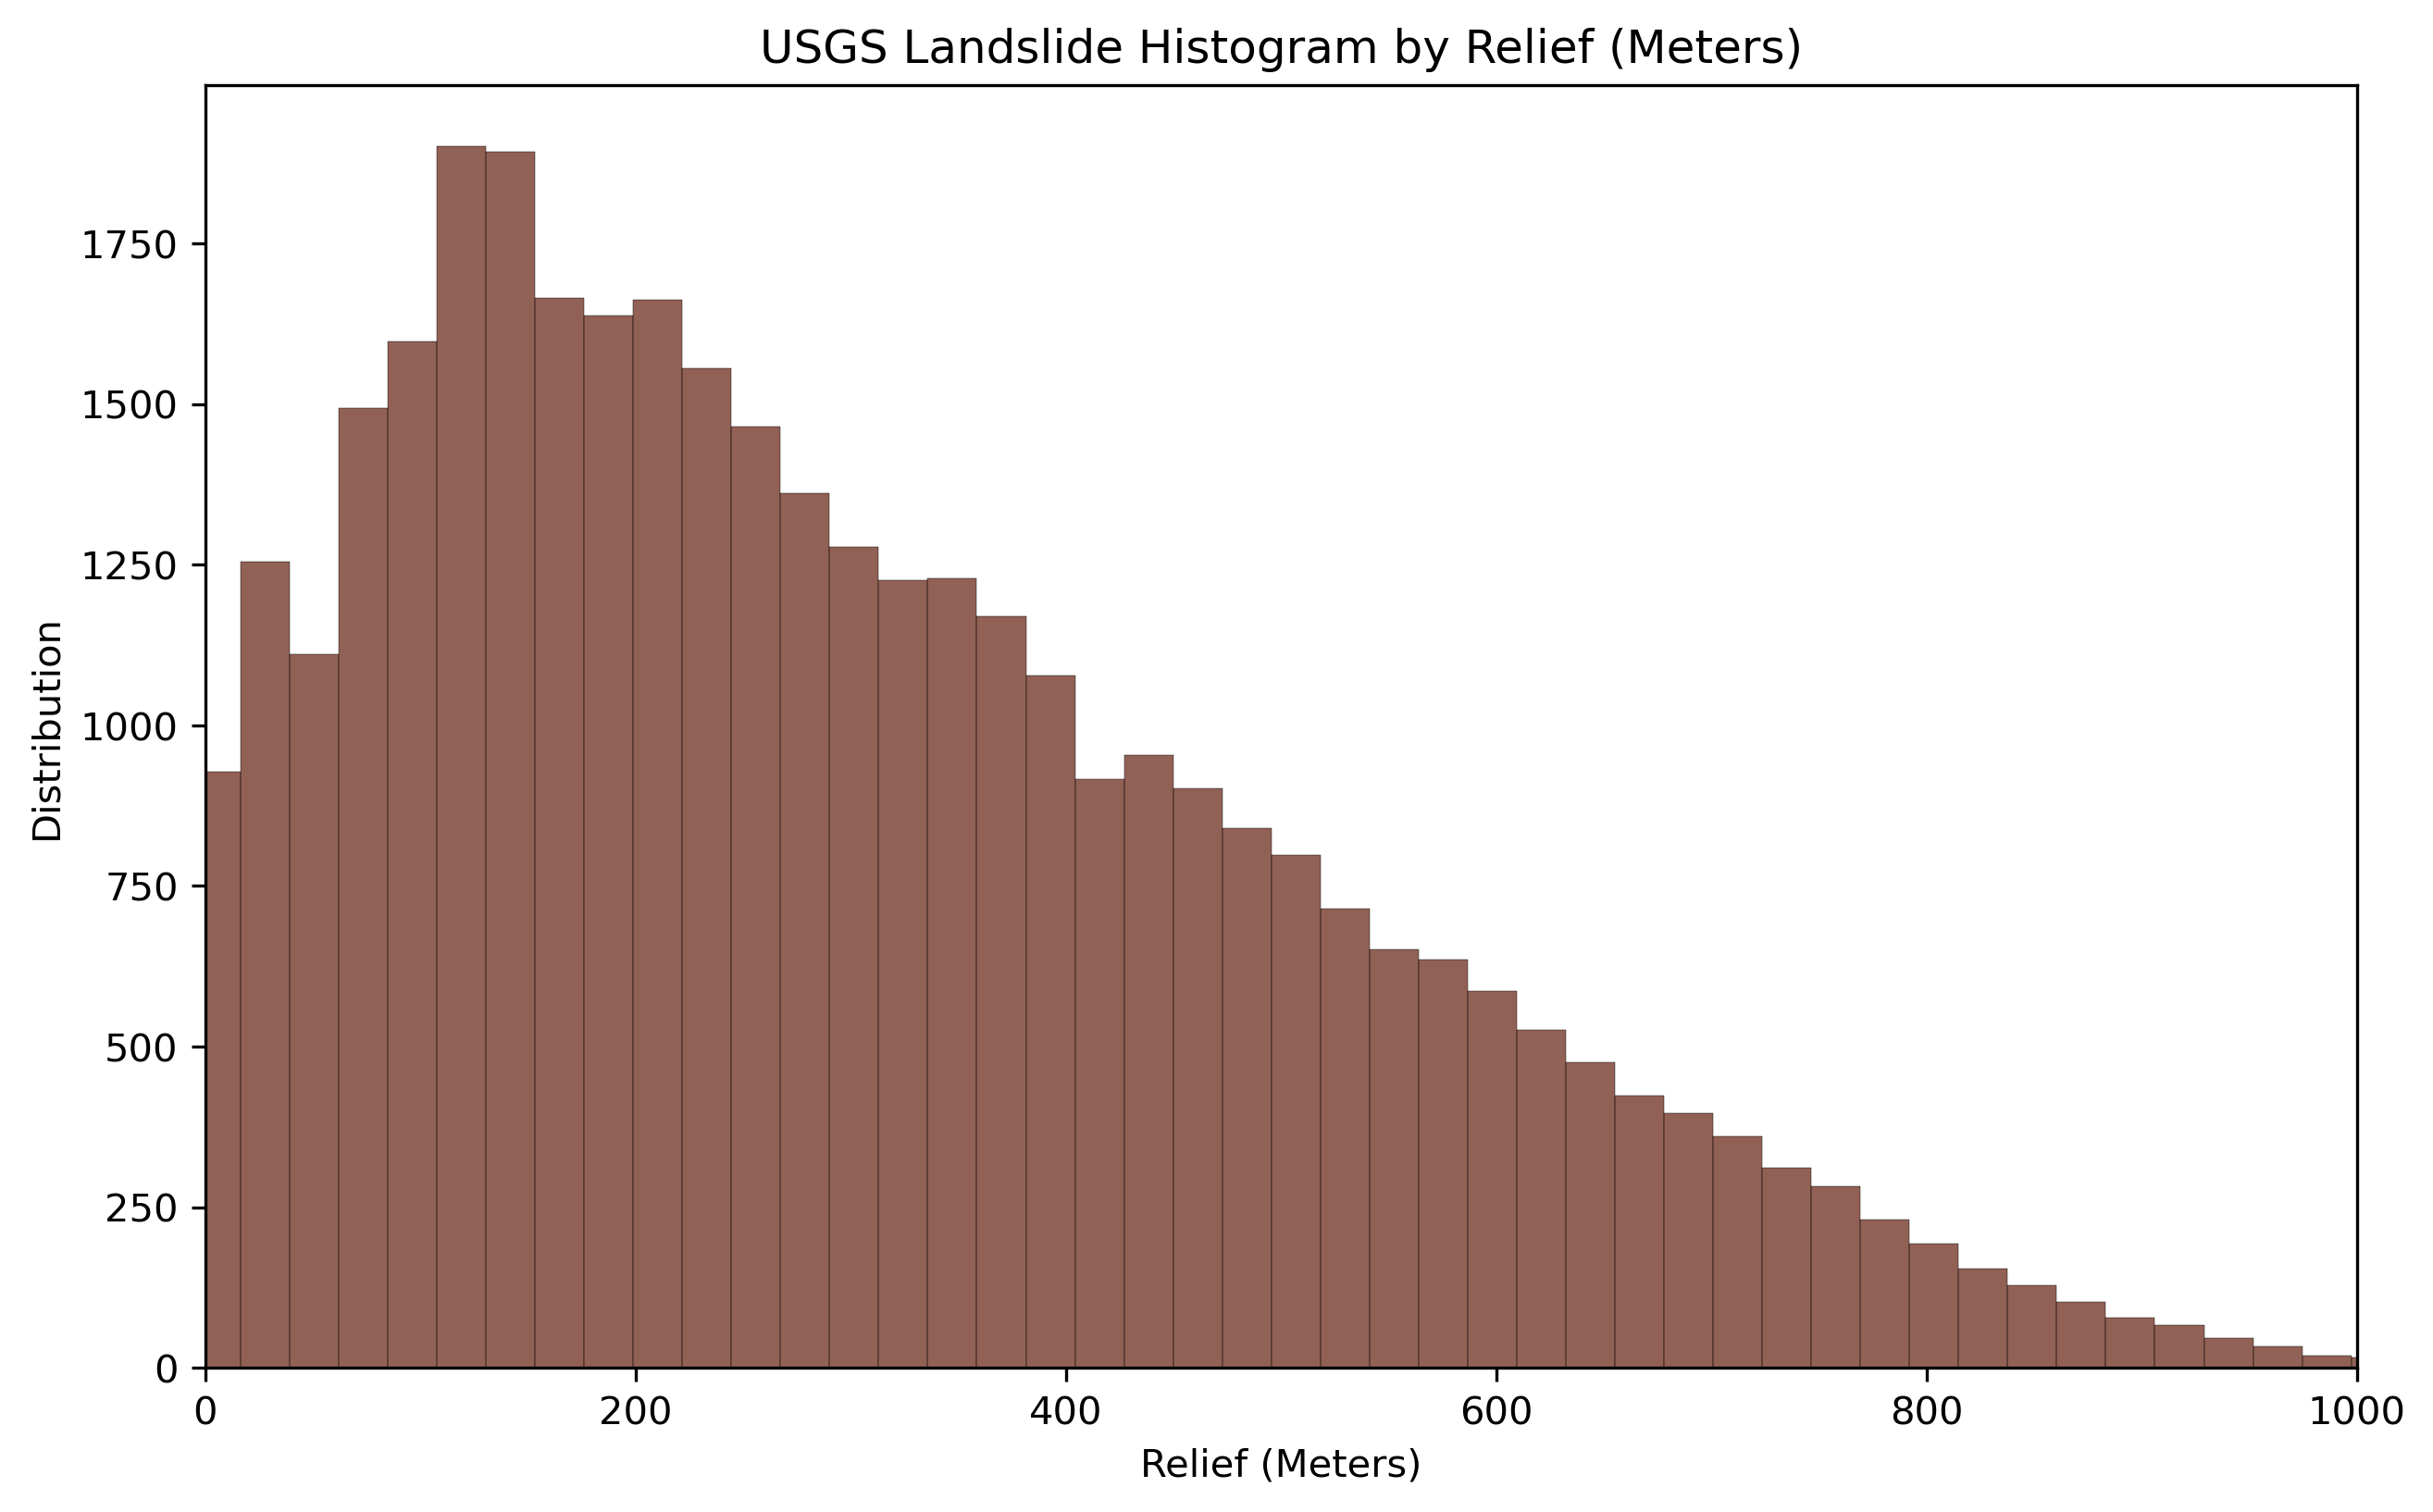

In [15]:
plt.figure(figsize=(10, 6), dpi=300)

# Plotting the distribution with seaborn
sns.histplot(
    usgs_conf_query_new['relief_m'], 
    bins=500, 
    color='#6c2c1e', 
)

# Updating the title and axis labels
plt.title('USGS Landslide Histogram by Relief (Meters)')
plt.xlabel('Relief (Meters)')
plt.ylabel('Distribution')

plt.xlim(0, 1000)

# Display the plot
plt.show()


Write to csv

In [16]:
usgs_conf_query_new.to_csv('USGS_Conf_8.csv')

-----

### Related USGS County Analysis Data

In [17]:
#usg_county_analysis = pd.read_csv('USGS_County_Analysis.csv')

In [18]:
#usg_county_analysis.head()

# **NASA Landslide Points**

#### **Note**
#### Good inventory. I have a structured output below to create a better view of lat/longs to search Arcgis. 

In [19]:
## Load
nasa_global_ls_points = pd.read_csv('nasa_global_landslide_catalog_point.csv')

In [20]:
print(nasa_global_ls_points.shape)
nasa_global_ls_points.head(1).T

(39633, 31)


,0
OBJECTID,18285691
Shape,"(107.45000000000005, 32.56250000000006)"
source_name,AGU
source_link,https://blogs.agu.org/landslideblog/2008/10/14...
event_id,684
event_date,2008-08-01 00:00:00
event_time,NaN
event_title,"Sigou Village, Loufan County, Shanxi Province"
event_description,"occurred early in morning, 11 villagers buried..."
location_description,"Sigou Village, Loufan County, Shanxi Province"


In [21]:
## Count by Country Code
country_df = pd.DataFrame(nasa_global_ls_points.groupby('country_code').size().sort_values(ascending=False))
country_df.iloc[0:20,:]

,0
country_code,
VN,10744
MM,9094
US,3973
MX,3971
IN,1741
LA,1670
PH,778
CN,600
NP,587


In [22]:
## Review of Size Categories
nasa_global_ls_points['landslide_size'].unique()

array(['large', 'small', 'medium', 'very_large', 'unknown',
       'catastrophic', nan, 'Unknown'], dtype=object)

In [43]:
nasa_global_ls_points.columns

Index(['OBJECTID', 'Shape', 'source_name', 'source_link', 'event_id',
       'event_date', 'event_time', 'event_title', 'event_description',
       'location_description', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'landslide_setting',
       'fatality_count', 'injury_count', 'storm_name', 'photo_link',
       'comments', 'event_import_source', 'event_import_id', 'latitude',
       'longitude', 'country_name', 'country_code', 'admin_division_name',
       'gazetteer_closest_point', 'gazetteer_distance', 'submitted_date',
       'last_edited_date'],
      dtype='object')

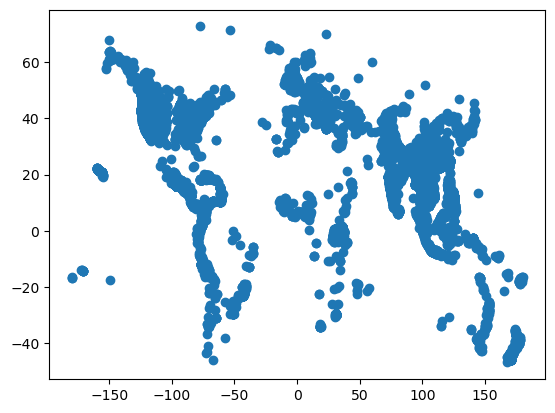

In [44]:
import matplotlib.pyplot as plt
plt.scatter(x=nasa_global_ls_points['longitude'], y=nasa_global_ls_points['latitude'])
plt.show()

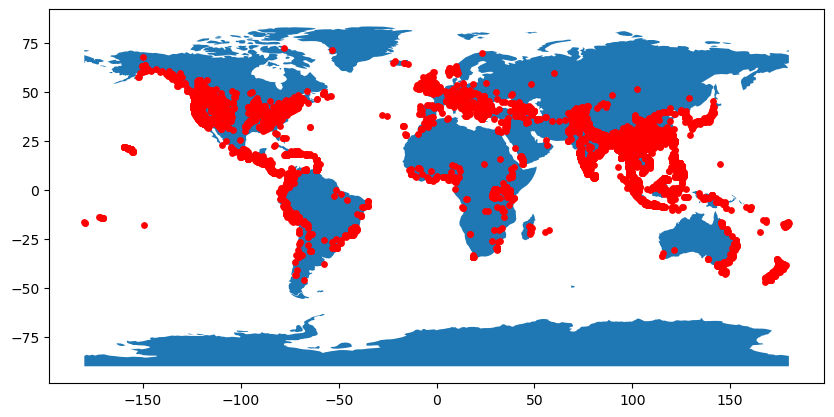

In [53]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

geometry = [Point(xy) for xy in zip(nasa_global_ls_points['longitude'], nasa_global_ls_points['latitude'])]
gdf = GeoDataFrame(nasa_global_ls_points, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [65]:
nasa_global_ls_points['fatality_count'].isna().sum()

28760

In [66]:
nasa_global_ls_points['fatality_count'].notna().sum()

10873

In [76]:
fatalities_clean = nasa_global_ls_points.dropna(subset=['latitude','longitude', 'fatality_count'])

In [77]:
fatalities_clean['fatality_count'].isna().sum()

0

In [78]:
fatality_heatmap_data = list(map(list, zip(fatalities_clean['latitude'],
fatalities_clean['longitude'],
fatalities_clean['fatality_count']
)
)
)
fatality_heatmap_data[:5]

[[32.5625, 107.45, 11.0],
 [45.42, -122.663, 0.0],
 [-11.1295, -75.3587, 10.0],
 [28.8378, 81.708, 1.0],
 [10.3336, 123.8978, 0.0]]

In [82]:
import folium
map_object = folium.Map(location = [45.39260000000007,-122.5272], zoom_start = 5)
from folium.plugins import HeatMap
HeatMap(fatality_heatmap_data).add_to(map_object)
map_object

In [83]:
nasa_global_ls_points['landslide_size'].value_counts()

landslide_size
unknown         23151
medium           7150
small            3504
large            1006
Unknown           361
very_large        149
catastrophic       26
Name: count, dtype: int64

In [103]:
subset_df = nasa_global_ls_points[nasa_global_ls_points['landslide_size'].isin(['very_large','catastrophic'])]

In [104]:
subset_df['landslide_size'].value_counts()

landslide_size
very_large      149
catastrophic     26
Name: count, dtype: int64

In [105]:
subset_df.columns

Index(['OBJECTID', 'Shape', 'source_name', 'source_link', 'event_id',
       'event_date', 'event_time', 'event_title', 'event_description',
       'location_description', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'landslide_setting',
       'fatality_count', 'injury_count', 'storm_name', 'photo_link',
       'comments', 'event_import_source', 'event_import_id', 'latitude',
       'longitude', 'country_name', 'country_code', 'admin_division_name',
       'gazetteer_closest_point', 'gazetteer_distance', 'submitted_date',
       'last_edited_date'],
      dtype='object')

In [106]:
subset_df['landslide_size'] = subset_df['landslide_size'].replace({'small': 1, 'medium': 2, 'large': 3, 'very_large': 4, 'catastrophic':5})

/tmp/ipykernel_10659/2384045430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['landslide_size'] = subset_df['landslide_size'].replace({'small': 1, 'medium': 2, 'large': 3, 'very_large': 4, 'catastrophic':5})


In [107]:
landslide_size_heatmap_data = list(map(list, zip(subset_df['latitude'],
subset_df['longitude'],
subset_df['landslide_size']
)
)
)
landslide_size_heatmap_data[:5]

[[-22.2331, -42.6018, 4],
 [43.21843612, -109.48476745, 4],
 [-6.311708, 106.801076, 4],
 [35.86431353, -121.43049941, 4],
 [71.53659933, -53.20874578, 5]]

In [108]:
map_object = folium.Map(location = [45.39260000000007,-122.5272], zoom_start = 5)
from folium.plugins import HeatMap
HeatMap(landslide_size_heatmap_data).add_to(map_object)
map_object

----

## Filter: US and Larger Landslides

In [23]:
## Filter for US
nasa_us_query = nasa_global_ls_points.query("country_code == 'US' and (landslide_size == 'medium' or landslide_size == 'large' or landslide_size == 'very_large' or landslide_size == 'catastrophic')")

In [24]:
nasa_us_query.shape

(1390, 31)

In [25]:
nasa_us_query.head(3)

,OBJECTID,Shape,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,comments,event_import_source,event_import_id,latitude,longitude,country_name,country_code,admin_division_name,gazetteer_closest_point,gazetteer_distance,submitted_date,last_edited_date
8,18285699,"(-114.41939999999994, 43.684600000000046)",MagicValley.com,http://magicvalley.com/news/local/first-fires-...,236,2007-09-05 00:00:00,10:00,"Warm Springs Road, Idaho","5 feet deep mud, Hotshot crew was trapped whil...","Warm Springs Road, Idaho",5km,mudslide,rain,medium,unknown,NaN,NaN,NaN,NaN,NaN,GLC,236,43.6846,-114.4194,United States,US,Idaho,Ketchum,4.71,2014-04-01 00:00:00,2024-10-03 06:41:49
17,18285708,"(-121.74999999999994, 48.53800000000007)",Corvallis Gazette-Times,http://www.gazettetimes.com/news/local/floodwa...,962,2009-01-07 00:00:00,NaN,"Concrete, 70 miles northeast of Seattle,Washin...",Rainfall totals for the 24 hours ending at 2 p...,"Concrete, 70 miles northeast of Seattle,Washin...",5km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,GLC,962,48.5380,-121.7500,United States,US,Washington,Concrete,0.25,2014-09-15 17:52:11,2024-10-03 06:41:49
45,18285736,"(-132.72689999999994, 56.55610000000007)",Alaska Business,http://www.akbizmag.com/Alaska-Business-Monthl...,1181,2009-09-20 18:30:00,18:00,"Mile point 5.4 on Mitkof Highway, Petersburg, ...","On Sunday, a mudslide came down at mile point ...","Mile point 5.4 on Mitkof Highway, Petersburg, ...",10km,mudslide,downpour,medium,unknown,NaN,NaN,NaN,NaN,NaN,GLC,1181,56.5561,-132.7269,United States,US,Alaska,Mitkof Island,9.94,2014-04-01 00:00:00,2024-10-03 06:41:49


In [26]:
nasa_us_query.iloc[:,[1,3,4,5,7,8,9,11,13]].head(4)

,Shape,source_link,event_id,event_date,event_title,event_description,location_description,landslide_category,landslide_size
8,"(-114.41939999999994, 43.684600000000046)",http://magicvalley.com/news/local/first-fires-...,236,2007-09-05 00:00:00,"Warm Springs Road, Idaho","5 feet deep mud, Hotshot crew was trapped whil...","Warm Springs Road, Idaho",mudslide,medium
17,"(-121.74999999999994, 48.53800000000007)",http://www.gazettetimes.com/news/local/floodwa...,962,2009-01-07 00:00:00,"Concrete, 70 miles northeast of Seattle,Washin...",Rainfall totals for the 24 hours ending at 2 p...,"Concrete, 70 miles northeast of Seattle,Washin...",landslide,medium
45,"(-132.72689999999994, 56.55610000000007)",http://www.akbizmag.com/Alaska-Business-Monthl...,1181,2009-09-20 18:30:00,"Mile point 5.4 on Mitkof Highway, Petersburg, ...","On Sunday, a mudslide came down at mile point ...","Mile point 5.4 on Mitkof Highway, Petersburg, ...",mudslide,medium
46,"(-132.73479999999995, 56.56920000000008)",http://www.akbizmag.com/Alaska-Business-Monthl...,1187,2009-09-22 02:00:00,"Mile 4.5, Mitkof Highway, Alaska",An additional slide covered part of the Mitkof...,"Mile 4.5, Mitkof Highway, Alaska",mudslide,medium


### Write to CSV

In [27]:
nasa_us_query.iloc[:,[1,3,4,5,7,8,9,11,13]].to_csv('landslidedatav3.csv')

## Filter: Non-US and Larger Landslides

In [28]:
nasa_nonus_query = nasa_global_ls_points.query("country_code != 'US' and (landslide_size == 'large' or landslide_size == 'very_large' or landslide_size == 'catastrophic')")

In [29]:
nasa_nonus_query.iloc[:,[1,3,4,5,7,8,9,11,13]].to_csv('landslidedata.csv')
print(nasa_nonus_query.shape)

(1075, 31)


#### Print to CSV

In [30]:
nasa_nonus_query.iloc[:,[1,3,4,5,7,8,9,11,13]].to_csv('landslidedata_nonUSv2.csv')

### Unique Query by Event ID

In [31]:
item_temp_df = nasa_global_ls_points.query('event_id == 8334')
item_temp_df.head().T
# item_temp_df.iloc[:,7:16]

,7377
OBJECTID,18293068
Shape,"(-136.88779999999997, 58.73300000000006)"
source_name,Landslide Blog
source_link,http://blogs.agu.org/landslideblog/
event_id,8334
event_date,2016-06-28 08:21:00
event_time,08:00
event_title,Lamplugh Glacier
event_description,Paul estimates that the runout of the landslid...
location_description,Lamplugh Glacier


### Unique Record Query - State

In [32]:
## Query State
nasa_us_query_nc = nasa_us_query[nasa_us_query['event_title'].str.contains('Oregon', case=False, na=False)]
print(nasa_us_query_nc.shape)

(15, 31)


In [33]:
nasa_us_query_nc[0:10]

,OBJECTID,Shape,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,comments,event_import_source,event_import_id,latitude,longitude,country_name,country_code,admin_division_name,gazetteer_closest_point,gazetteer_distance,submitted_date,last_edited_date
588,18286279,"(-123.86729999999994, 43.67680000000007)",kpic.com,http://www.kpic.com/news/local/12189201.html,382,2007-12-04 17:30:00,17:00,"Highway 38 between Elkton and Reedsport, Oregon","occurred 5:30pm, many huge boulders blocking r...","Highway 38 between Elkton and Reedsport, Oregon",5km,complex,rain,medium,unknown,NaN,NaN,NaN,NaN,NaN,GLC,382,43.6768,-123.8673,United States,US,Oregon,Scottsburg,5.95,2014-04-01 00:00:00,2024-10-03 06:41:49
723,18286414,"(-124.22589999999997, 43.24790000000007)",kcby,http://www.kcby.com/news/local/87512322.html,1560,2010-03-12 07:30:00,07:00,"Highway 42 between Coquille and Coos, Oregon",The winds and rain blew a group of trees over ...,"Highway 42 between Coquille and Coos, Oregon",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,GLC,1560,43.2479,-124.2259,United States,US,Oregon,Coquille,7.57,2014-04-01 00:00:00,2024-10-03 06:41:49
1292,18286983,"(-122.71929999999998, 45.531300000000044)",kgw,http://www.kgw.com/news/Storm-causes-landslide...,4587,2012-10-15 00:00:00,NaN,"Lower Macleay Trail, Forest Park, Oregon",Crews with the Portland Parks and Recreation B...,"Lower Macleay Trail, Forest Park, Oregon",5km,landslide,downpour,medium,unknown,NaN,NaN,NaN,NaN,NaN,GLC,4587,45.5313,-122.7193,United States,US,Oregon,Pearson Airpark,11.13,2014-04-01 00:00:00,2024-10-03 06:42:30
1907,18287598,"(-123.83169999999996, 45.022800000000075)",gazettetimes,http://www.gazettetimes.com/news/local/article...,1561,2010-03-12 00:00:00,NaN,"Highway 18 milepost 11.2, east of Rose Lodge, ...",Traffic on Highway 18 will be detoured at mile...,"Highway 18 milepost 11.2, east of Rose Lodge, ...",5km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,GLC,1561,45.0228,-123.8317,United States,US,Oregon,Lincoln City,15.39,2014-04-01 00:00:00,2024-10-03 06:42:30
3605,18289296,"(-122.54369999999994, 45.331000000000074)",oregonlive,http://www.oregonlive.com/oregon-city/index.ss...,3193,2011-03-10 11:00:00,11:00,"between 15770 and 15684 Thayer rd., just east ...","Thayer Road was closed at 11:30 a.m. Thursday,...","between 15770 and 15684 Thayer rd., just east ...",exact,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,GLC,3193,45.3310,-122.5437,United States,US,Oregon,Canby,13.93,2014-04-01 00:00:00,2024-10-03 06:43:52
3664,18289355,"(-124.12069999999994, 44.102900000000034)",Corvallis Gazette-Times,http://www.gazettetimes.com/news/local/heavy-r...,7801,2006-11-07 09:00:00,09:00,"North of Florence, Oregon",A landslide 30 feet wide and 30 feet deep clos...,"North of Florence, Oregon",25km,mudslide,continuous_rain,medium,above_road,0.0,0.0,NaN,NaN,NaN,GLC,7801,44.1029,-124.1207,United States,US,Oregon,Florence Municipal,13.80,2016-06-23 14:26:08.000001,2024-10-03 06:43:52
3948,18289639,"(-122.5272, 45.39260000000007)",oregonlive,http://www.oregonlive.com/oregon-city/index.ss...,3194,2011-03-10 00:00:00,NaN,"between 16805 and 16171 Clackamas dr., Oregon ...","Clackamas River Drive, which had been temporar...","between 16805 and 16171 Clackamas dr., Oregon ...",1km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,GLC,3194,45.3926,-122.5272,United States,US,Oregon,Portland,10.53,2014-04-01 00:00:00,2024-10-03 06:43:52
4368,18290059,"(-122.38289999999995, 44.82680000000005)",statesmanjournal,http://www.statesmanjournal.com/apps/pbcs.dll/...,420,2008-01-10 00:00:00,NaN,"North Fork Road, Lyons, Oregon",highway may be closed for months,"North Fork Road, Lyons, Oregon",5km,landslide,rain,medium,unknown,NaN,NaN,NaN,NaN,NaN,GLC,420,44.8268,-122.3829,United States,US,Oregon

In [34]:
print(14.55963134765625 - 13.822174072265625)
print(46.29191774991382 -  45.85080395917834)
print((87.72171 -  87.342682)/2)
print((17.11848 -  17.481674)/2)

0.737457275390625
0.4411137907354785
0.18951400000000262
-0.181597


### Create BBox Coordinates - Not Needed with Arcgis

In [35]:
box_val_long = .01
box_val_lat = .01
coord_oo = np.array([-43.18203999999997, -22.50383999999997])

In [36]:
## Upper Left
print(coord_oo[0] + box_val_long, coord_oo[1] - box_val_lat)
## Lower Right
print(coord_oo[0] - box_val_long, coord_oo[1] + box_val_lat)

-43.172039999999974 -22.51383999999997
-43.19203999999997 -22.493839999999967


In [37]:
light_house=np.array([17.333333,-87.533333])

In [38]:
## Upper Left
print(light_house[0] + box_val_long, light_house[1] - box_val_lat)
## Lower Right
print(light_house[0] - box_val_long, light_house[1] + box_val_lat)

17.343333 -87.543333
17.323332999999998 -87.523333


### NASA Poly

In [39]:
nasa_global_ls_poly = pd.read_csv('nasa_global_landslide_catalog_poly.csv', low_memory=False)

In [40]:
print(nasa_global_ls_poly.shape)
nasa_global_ls_poly.head(5).T

(20056, 33)


,0,1,2,3,4
OBJECTID,5128824,5128825,5128826,5128827,5128828
Shape,"(-5.555387326483066, 56.874284598280134)","(6.3976060273762965, 45.867190917313096)","(91.78930989930488, 22.476020086349525)","(-121.59141472216379, 50.156430612115486)","(74.68364834102348, 36.35139709584039)"
source_name,BBC News,Nicolas GEORGE - Géolithe,in-person observation,Micheal Spence,AGU The Landslide Blog
source_link,http://www.bbc.com/news/uk-scotland-highlands-...,NaN,NaN,NaN,https://blogs.agu.org/landslideblog/2018/05/02...
event_id,11345,11346,11347,11348,11349
event_date,2018-01-22 00:00:00,1897-04-03 00:00:00,2017-07-24 00:00:00,2017-05-09 00:00:00,2018-04-09 00:00:00
event_time,unknown,05:00,unknown,unknown,NaN
event_title,West Highland Line Landslide at Loch Eilt,"Glissement de l'Andran, April 3, 1897",Regular Landslide,South spencer road,Ultar Glacier Rock and Ice Avalanche
event_description,Five passengers were on board when the train c...,"High volume event (10-20M cubic meters), rotat...",We have a plantation plot to reduce landslide ...,"huge slide, approx 500 foot across 500 foot deep.",A 3 km long Ultar Glacier avalanche sent rock ...
location_description,"Loch Eilt, West Highland Line, between Glenfin...","Manigod, Haute-Savoie, Auvergne-Rhône-Alpes",হাটহাজারী,"S Spencer Rd, Thompson-Nicola, British Columbi...",Gilgit Baltistan


## Earthquakes

https://earthquake.usgs.gov/earthquakes/search/

In [42]:
#eq = pd.read_csv('eq_two.csv')

In [ ]:
print(eq.shape)
eq.head(5).T

In [ ]:
# diab.groupby('group').agg({'group':'count', 'glufast':['mean','min','median','max']})
eq_df = pd.DataFrame(eq.groupby('type').size().sort_values(ascending=False))
eq_df.iloc[0:15,:]

## BigEarthNet

https://www.tensorflow.org/datasets/catalog/bigearthnet

## AWS Canopy Data

https://registry.opendata.aws/dataforgood-fb-forests/

In [ ]:
! pwd

In [ ]:
! ls

In [ ]:
pins = pd.read_json('pins_one.json')

In [ ]:
pins.head(20)

In [ ]:
pins['zoom'][0:20]